## Network Science Assignment 3 (HS22)

David Diener 19-733-179

Rafael Dubach 18-755-180

In [6]:
import math as m
import numpy as np
import matplotlib.pyplot as plt 
import networkx as nx
import os as os
import regex as re
from IPython.display import display, Markdown
from networkx.algorithms.smallworld import random_reference
from scipy.stats import pearsonr, spearmanr, kendalltau
from networkx.algorithms.link_analysis.pagerank_alg import pagerank





from typing import Tuple, List, Dict


from google.colab import drive
drive.mount('/content/drive')

jazz = nx.read_gml("/content/drive/MyDrive/Colab Notebooks/Exercise_3/graph_jazz_collab.gml")
polblog = nx.read_gml("/content/drive/MyDrive/Colab Notebooks/Exercise_3/graph_polblog.gml")
terrorists = nx.read_gml("/content/drive/MyDrive/Colab Notebooks/Exercise_3/graph_terrorists.gml")
florida = nx.read_graphml("/content/drive/MyDrive/Colab Notebooks/Exercise_3/Florida_foodweb.graphml")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## A03.1 Centrality correlations

For the given networks compute:
+ the degree 𝑘𝑖, closeness 𝑐𝑖, betweenness 𝑏𝑖 and eigenvector 𝑒𝑖 centrality for each node;
+ then do a scatter plot for each pair of centralities (6 plots total);
+ compute Pearson’s, Spearman’s and Kendall’s correlation
coefficients for each pair and note them on the scatter plots;
+ briefly explain, for the Jazz collaborations data, what each of
the centrality measures means in practice.

#Centrality Jazz

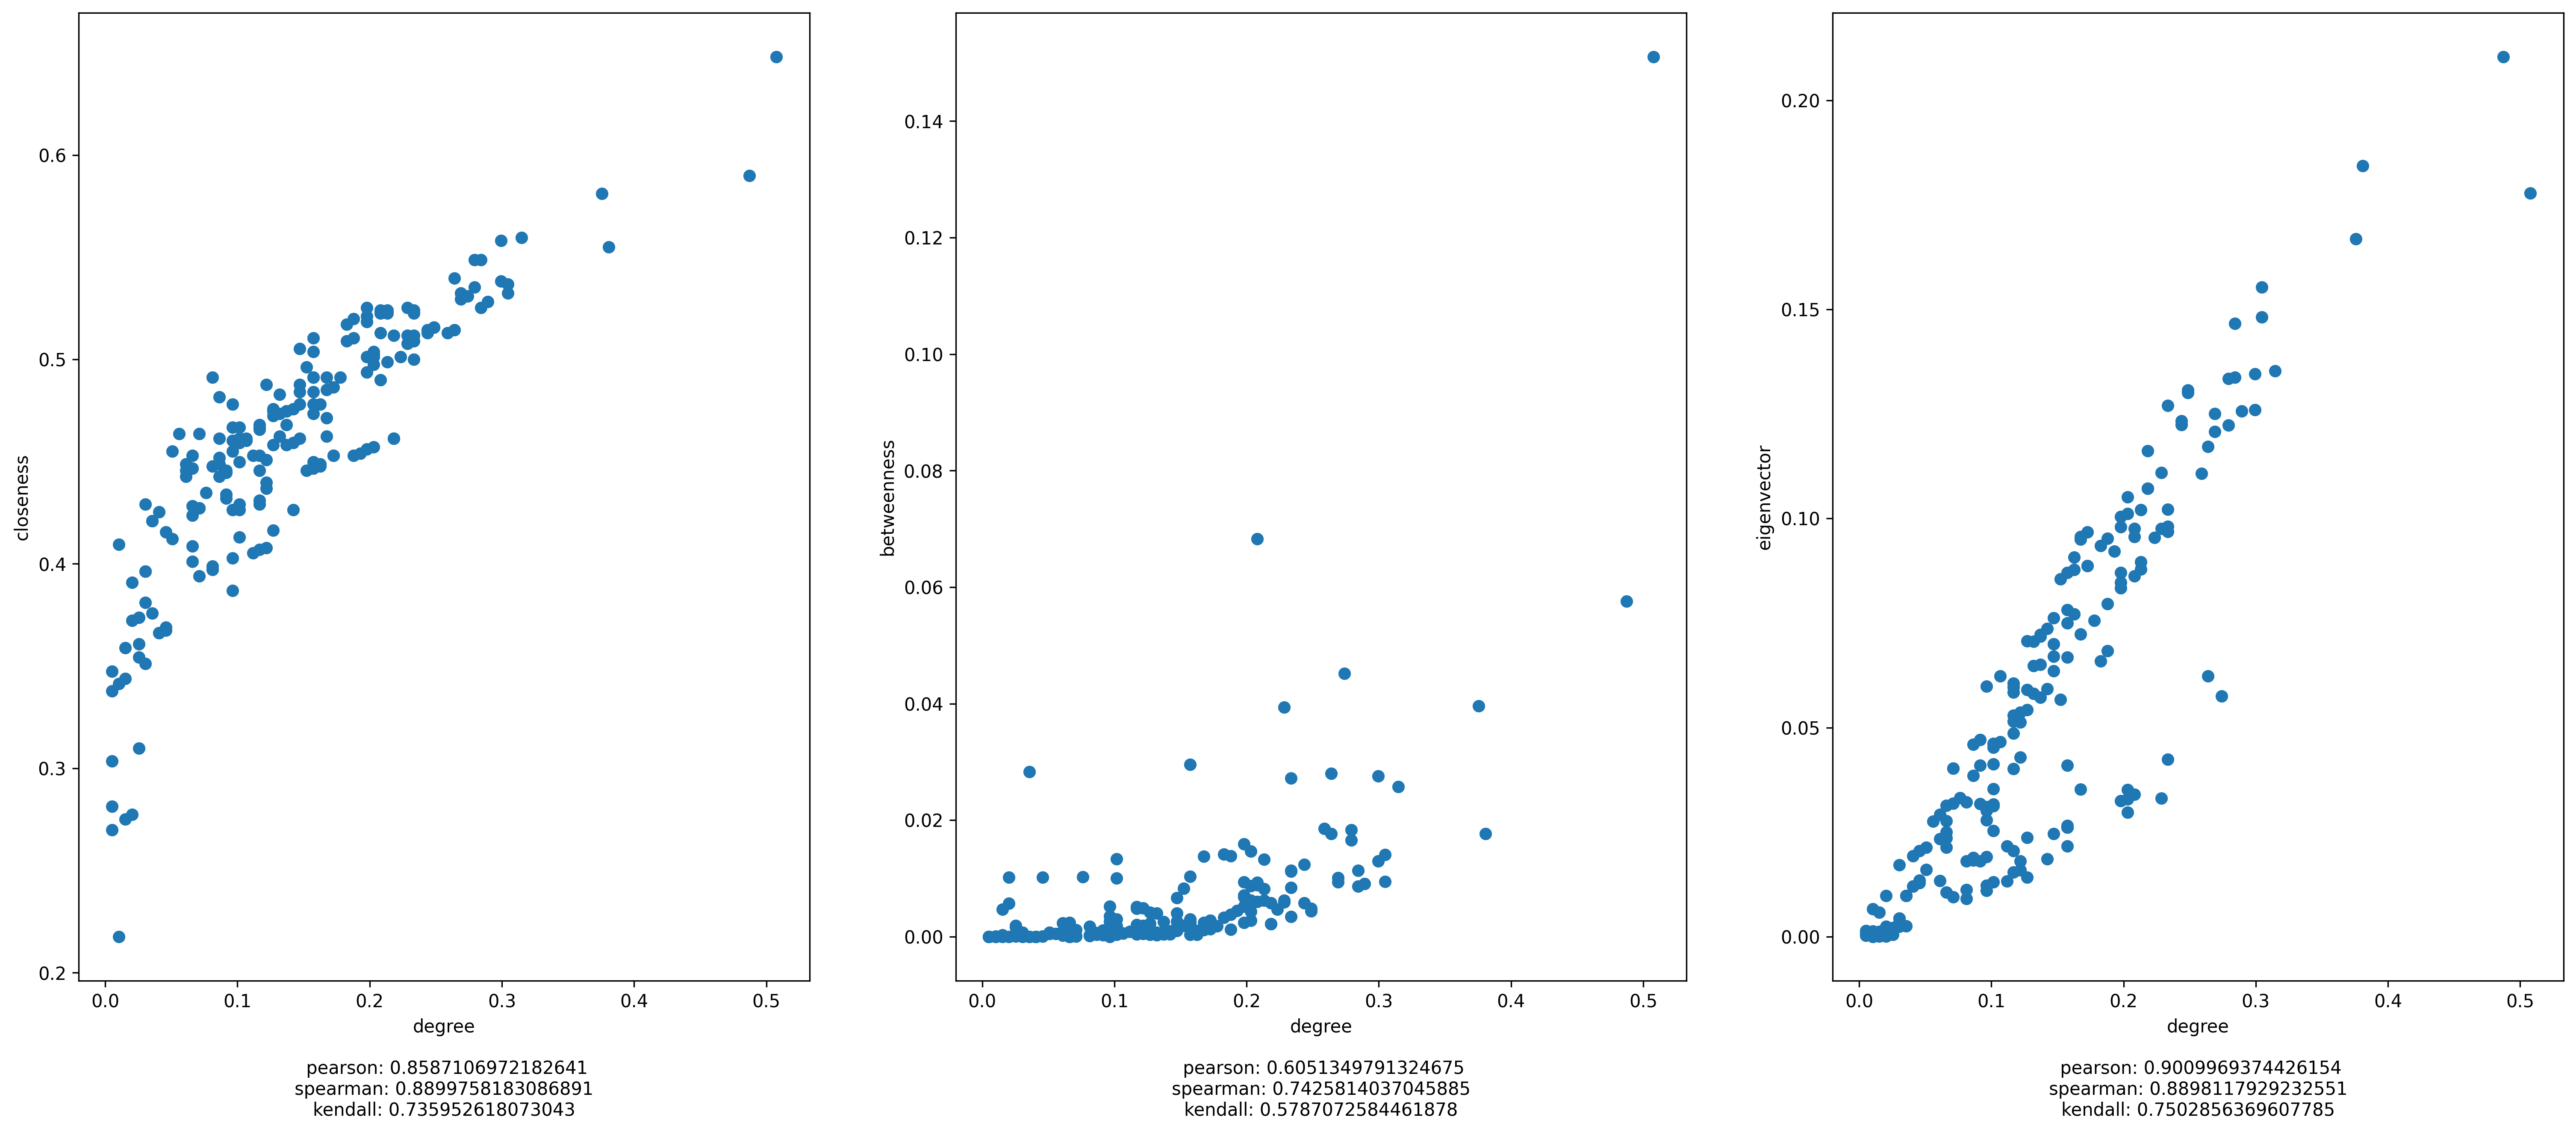

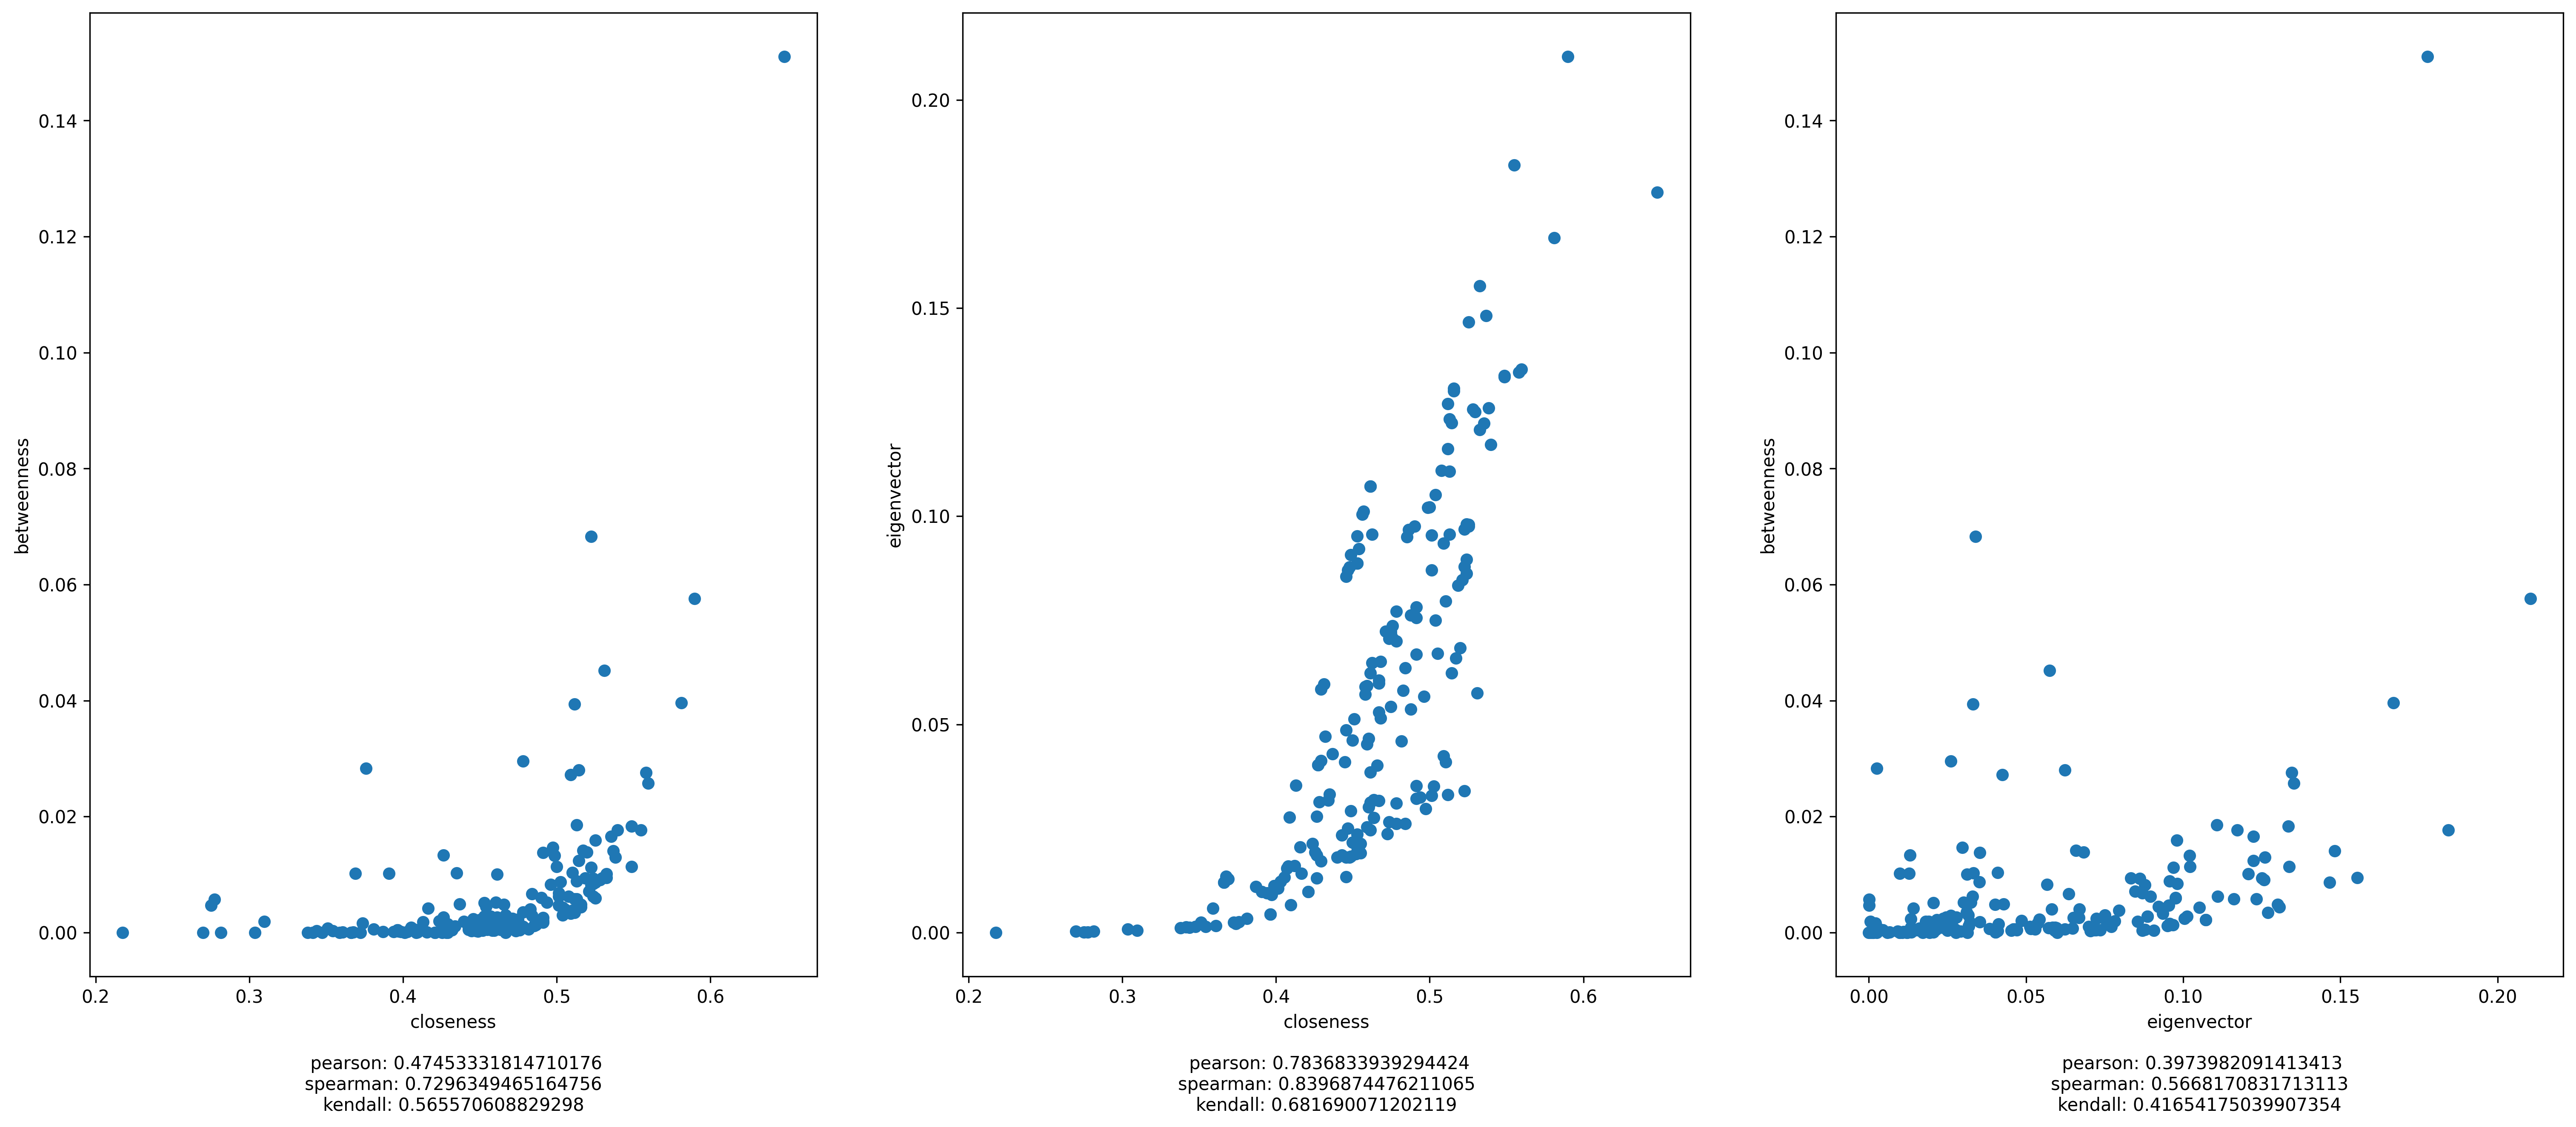

#Centrality Polblog

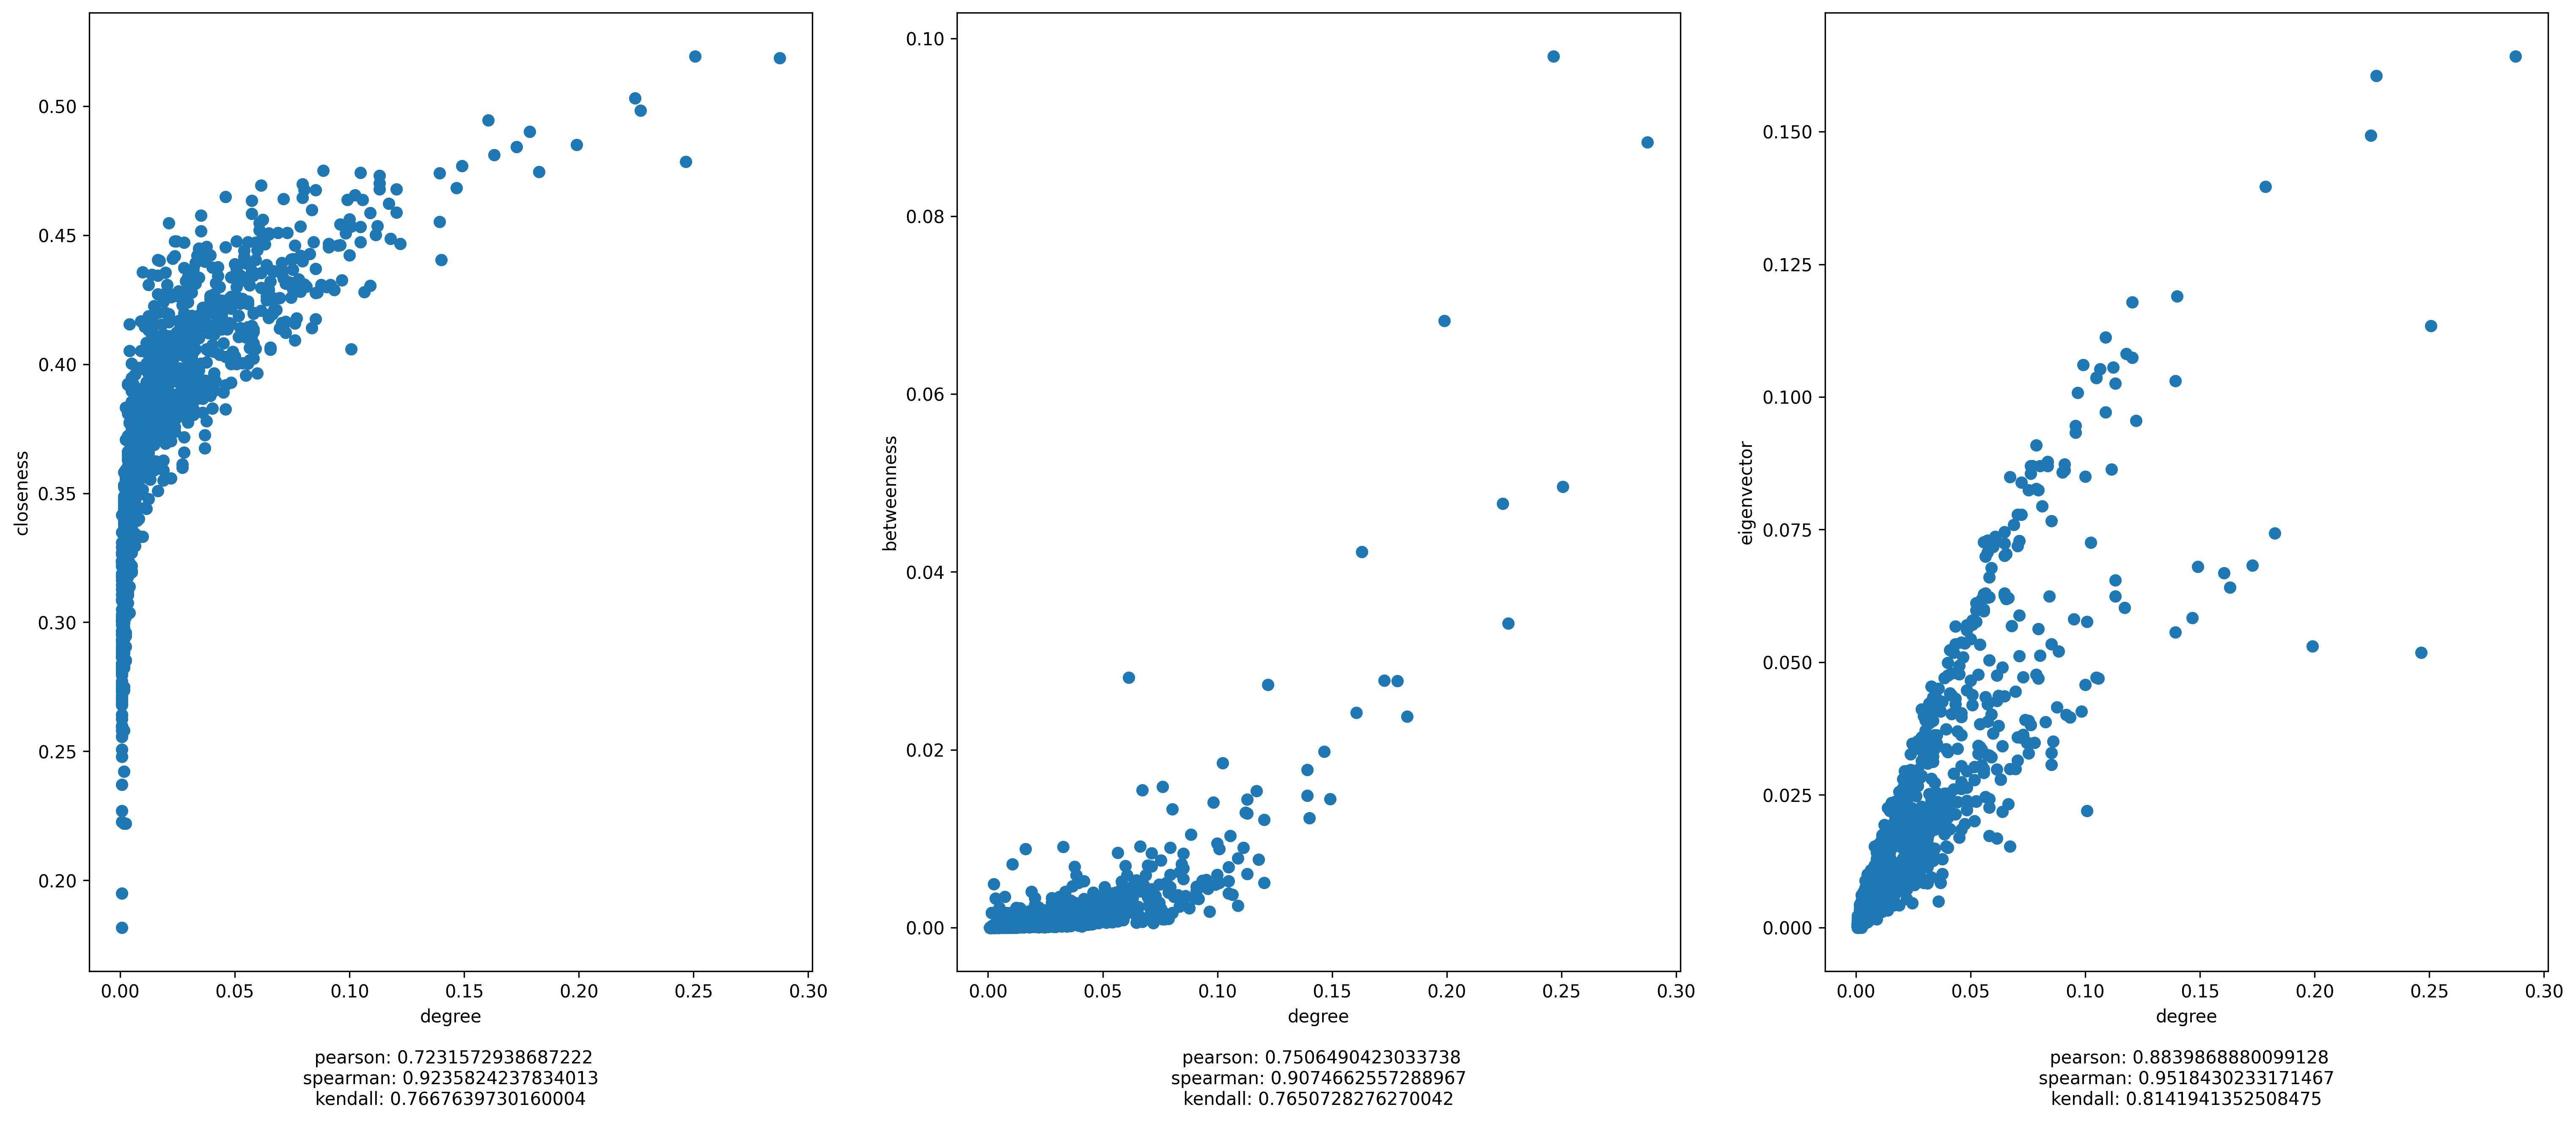

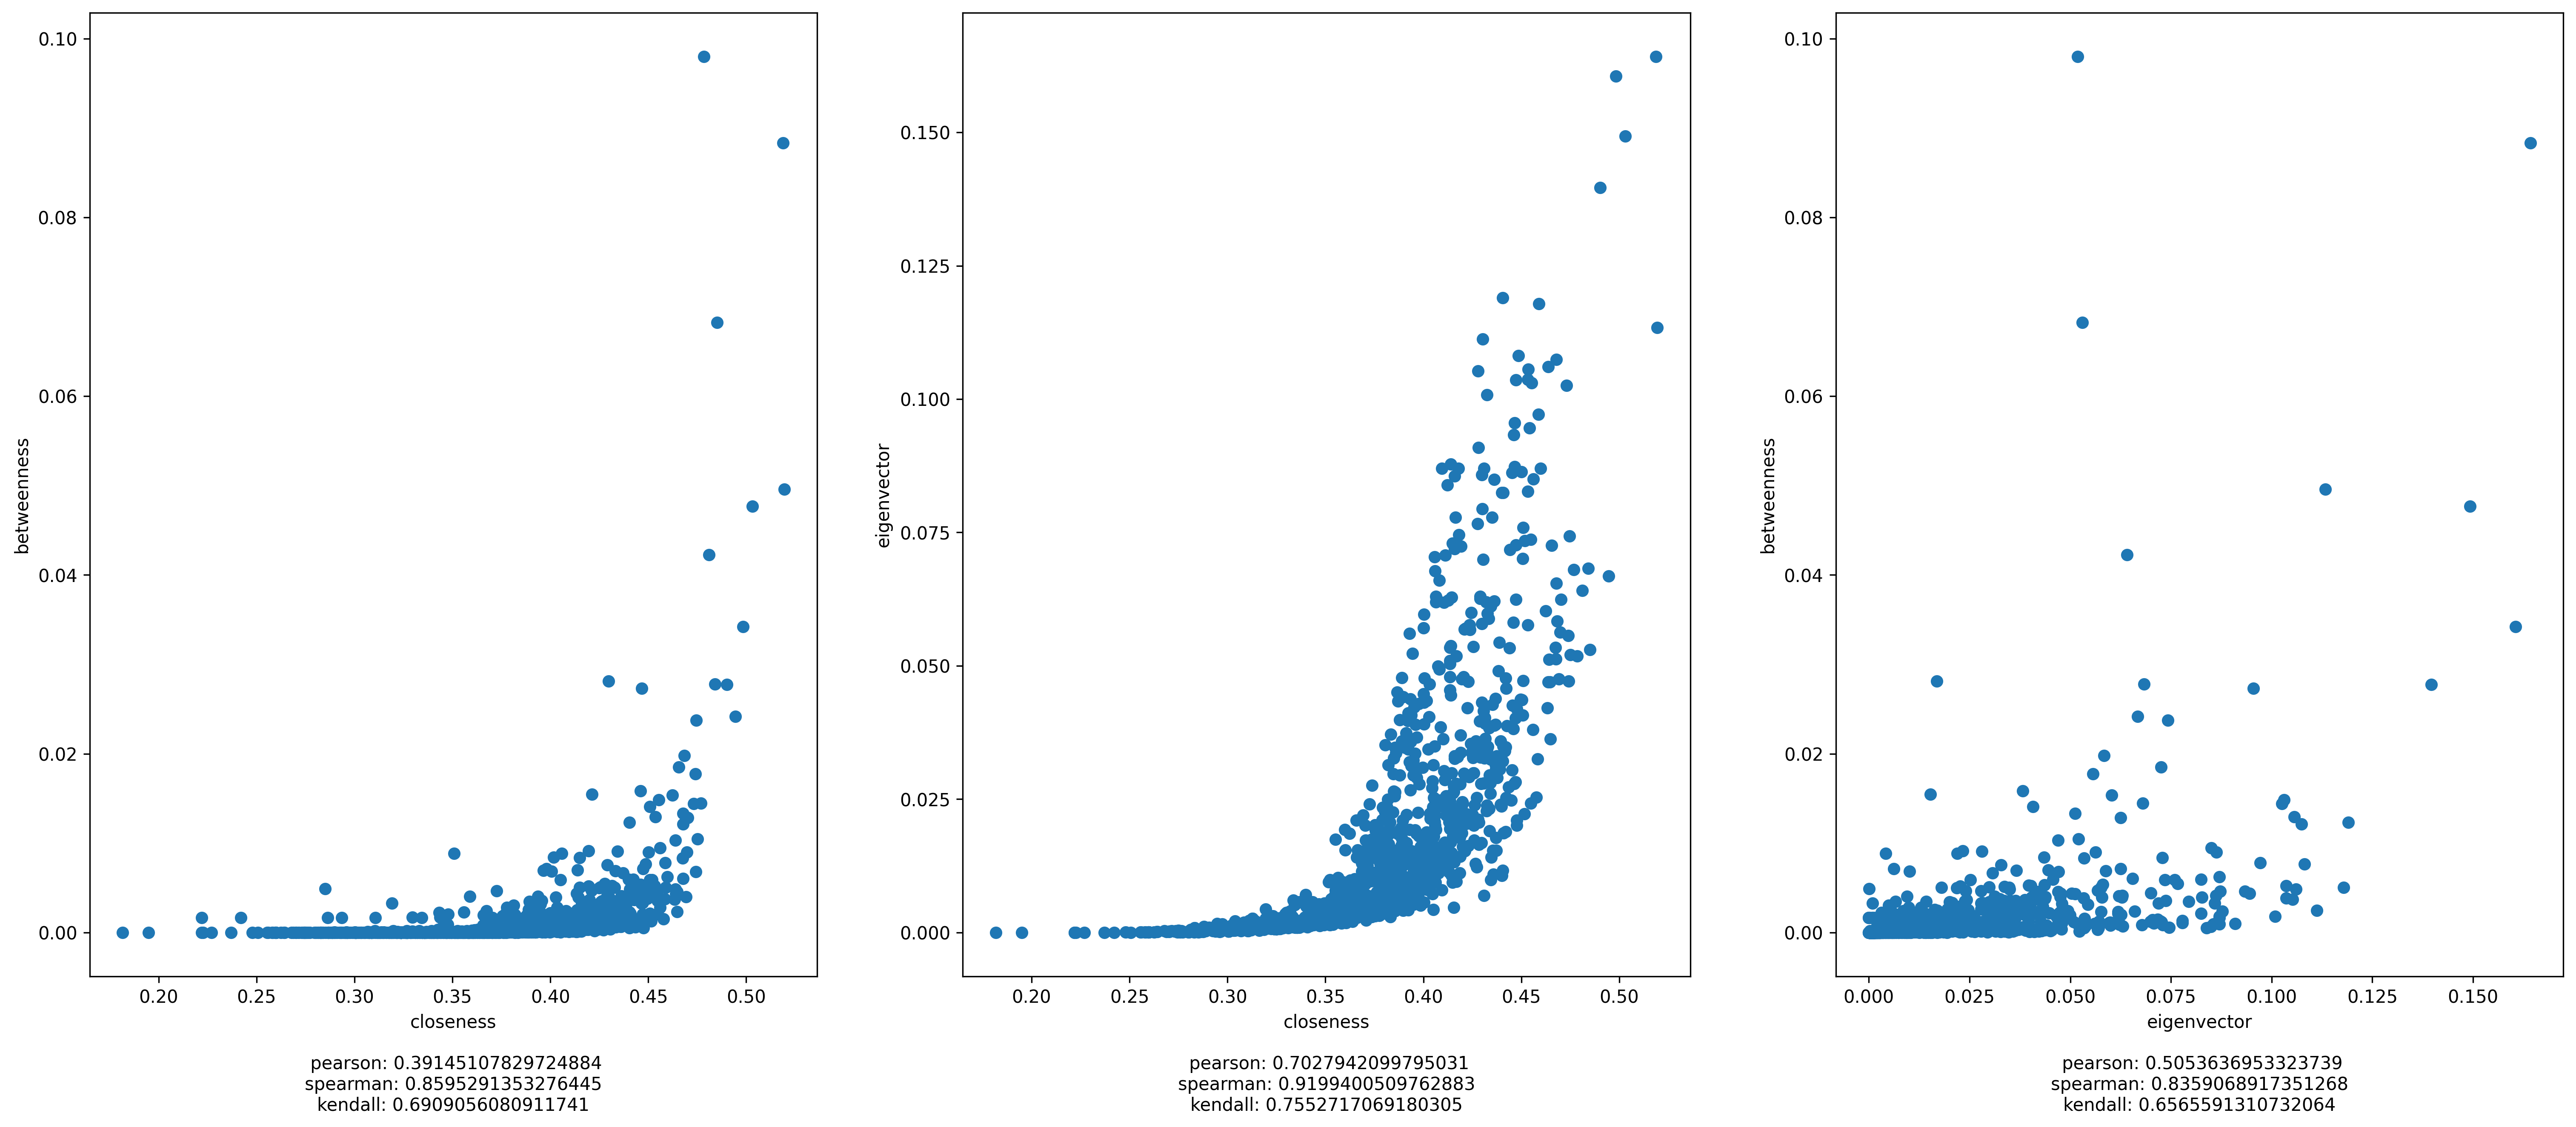

#Centrality terrorists

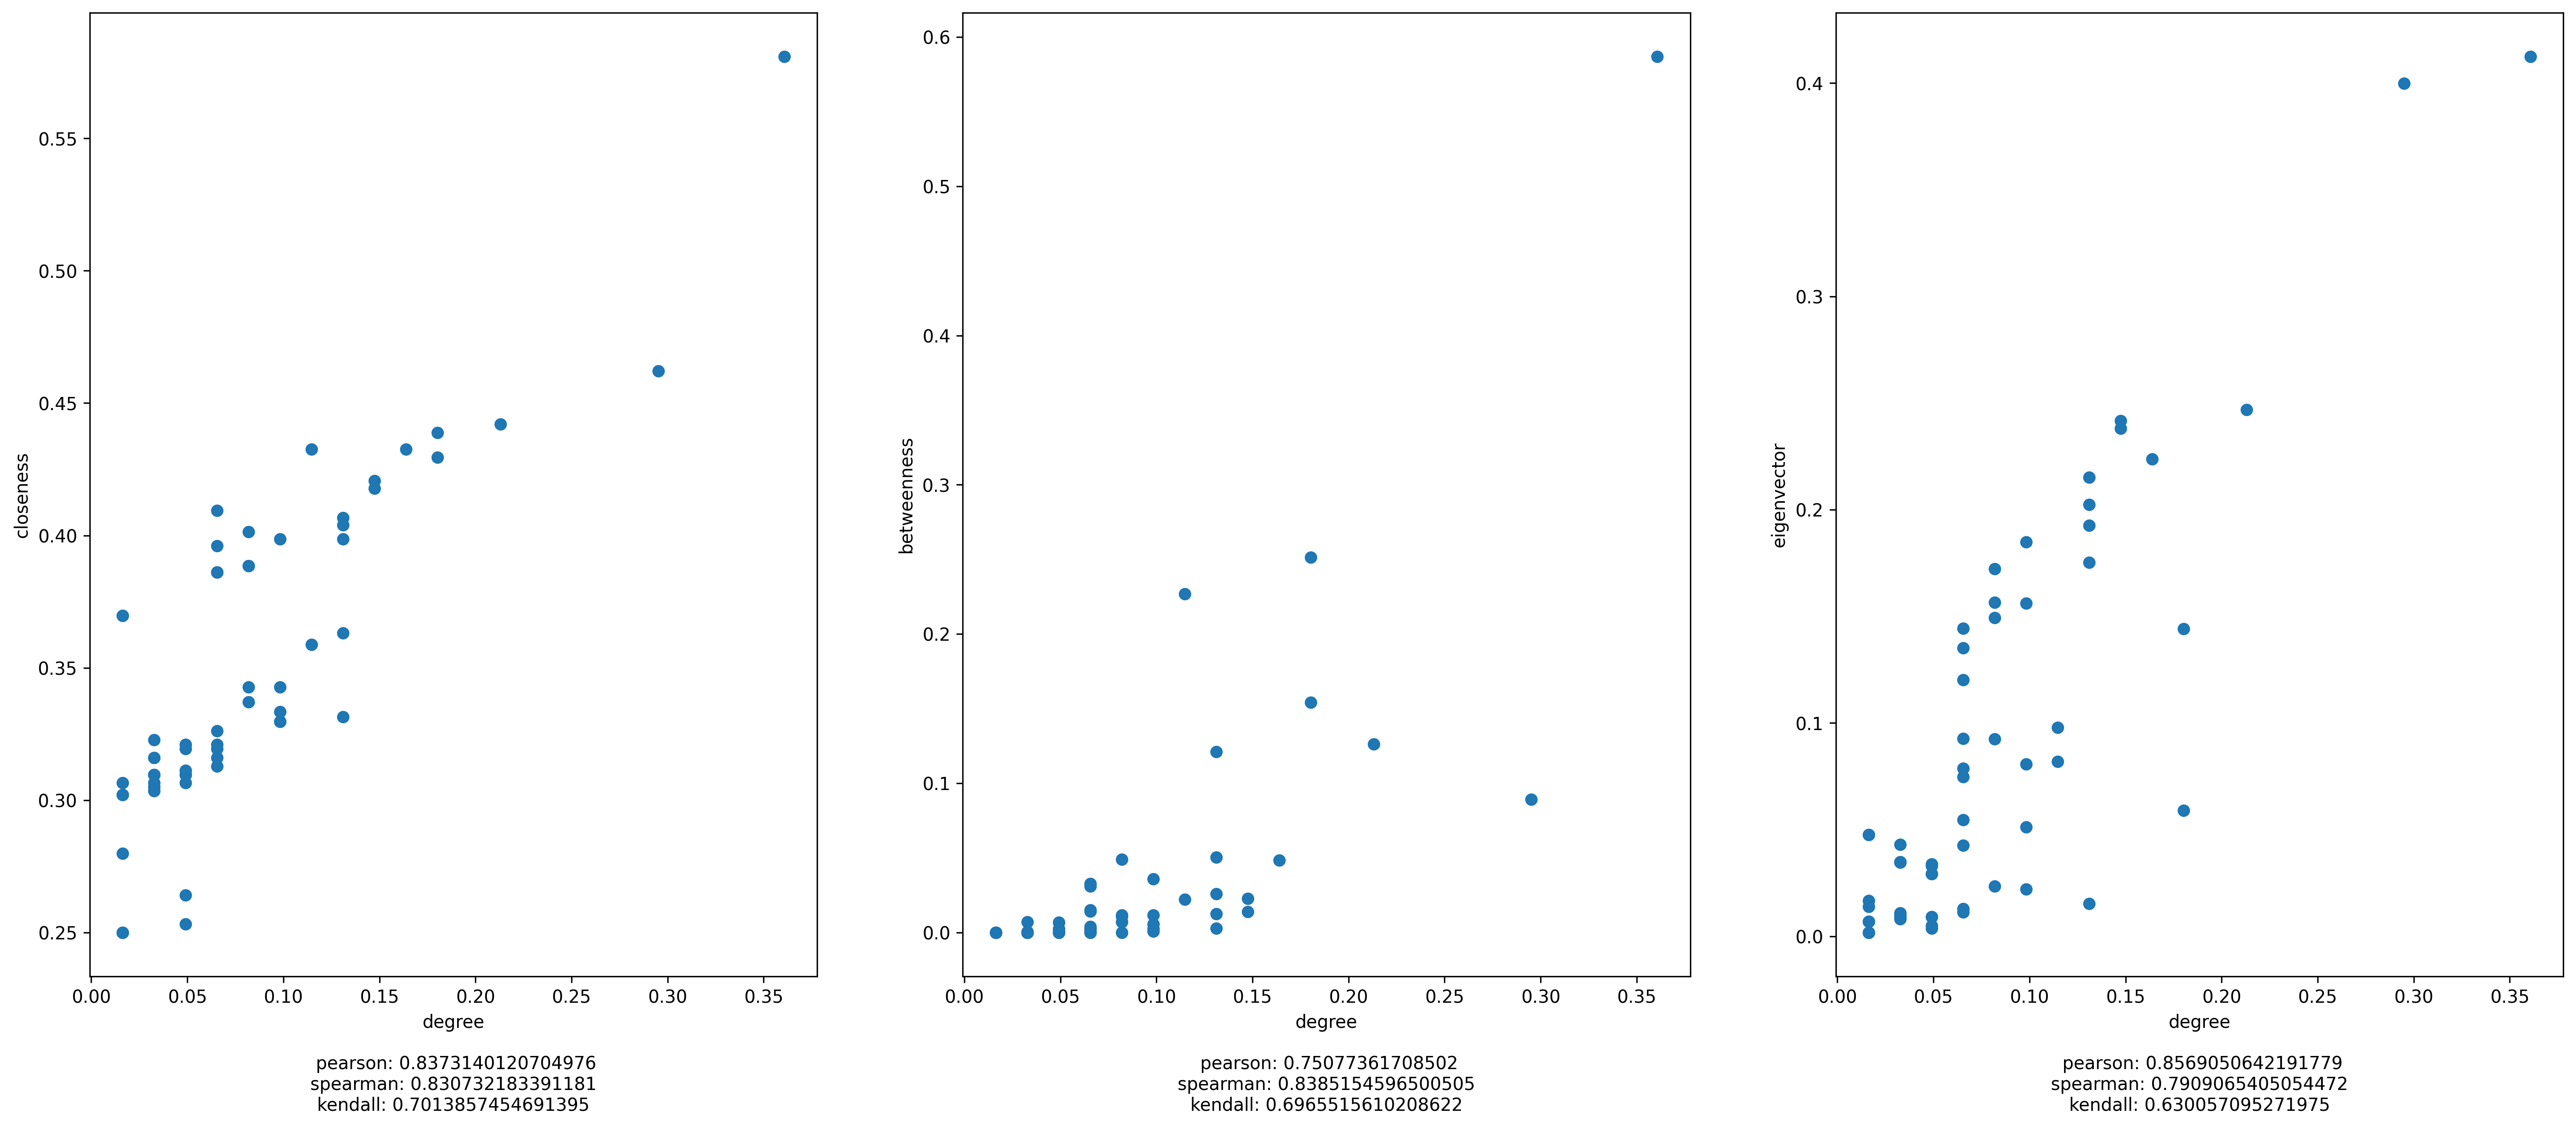

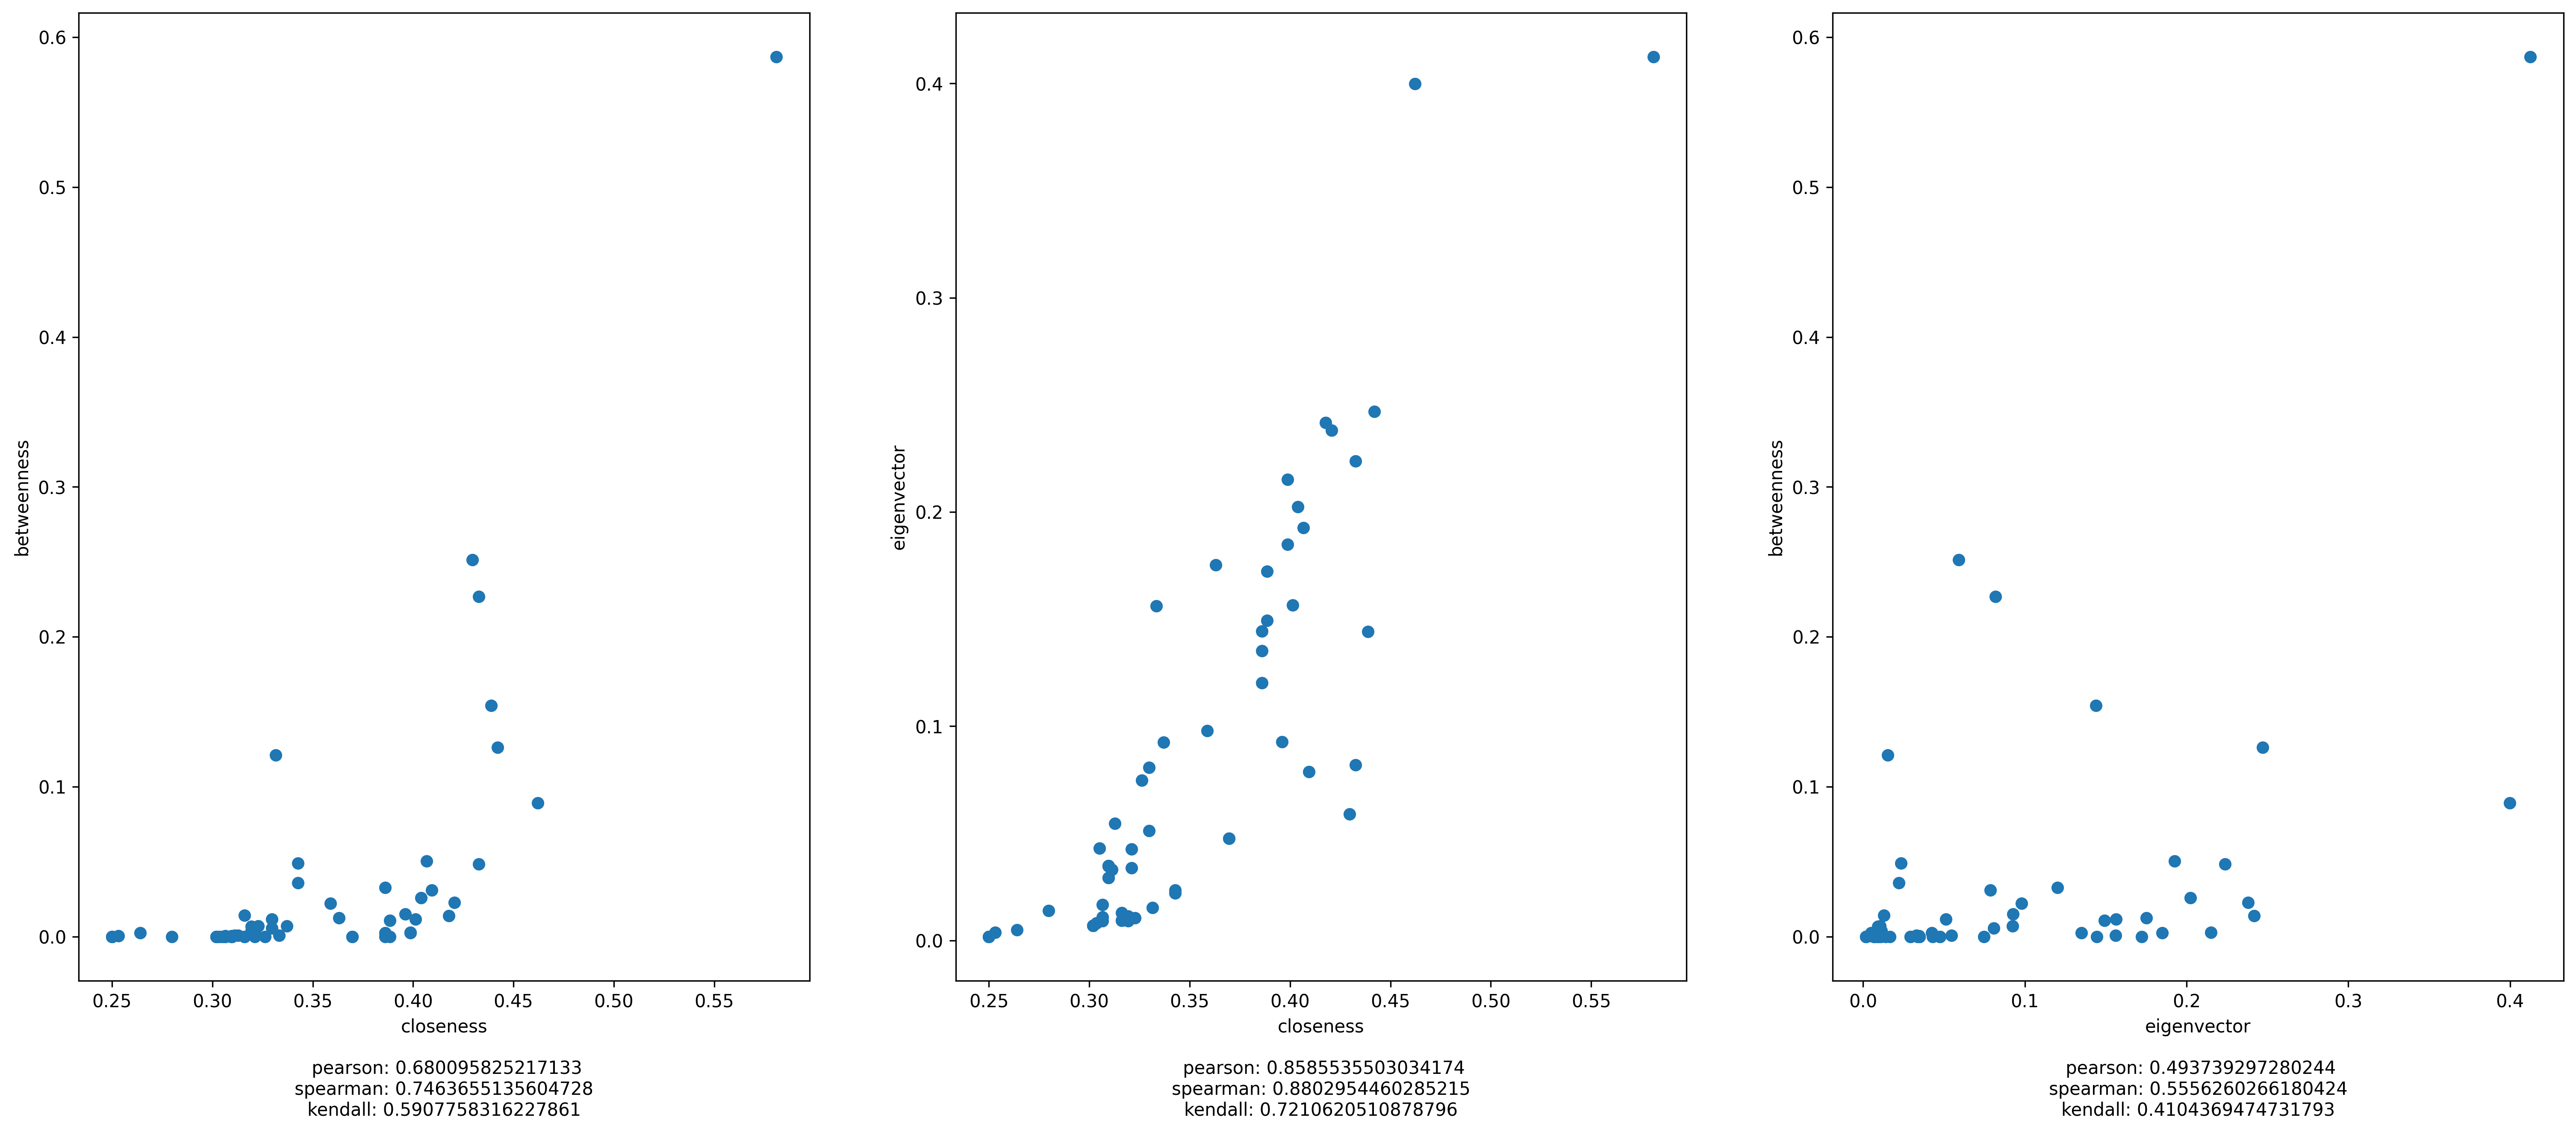

In [ ]:
def centrality_correlations(graph: nx.Graph, name):
  degree = list(nx.degree_centrality(graph).values())
  closeness = list(nx.closeness_centrality(graph).values())
  betweenness = list(nx.betweenness_centrality(graph).values())
  eigenvector = list(nx.eigenvector_centrality(graph).values())

  display(Markdown(f"#{name}"))
  plt.rcParams['figure.dpi'] = 300
  plt.rcParams['savefig.dpi'] = 300
  plt.subplots(figsize=(25, 10))
#plot 1:
  plt.subplot(1, 3, 1)
  plt.scatter(degree,closeness)
  pearson = pearsonr(degree, closeness)
  spearman = spearmanr(degree, closeness)
  kendall = kendalltau(degree, closeness)
  plt.xlabel("degree"+ f"\n \n pearson: {pearson[0]}\nspearman: {spearman[0]}\nkendall: {kendall[0]}")
  plt.ylabel("closeness")

#plot 2:
  plt.subplot(1, 3, 2)
  plt.scatter(degree,betweenness)
  pearson = pearsonr(degree, betweenness)
  spearman = spearmanr(degree, betweenness)
  kendall = kendalltau(degree, betweenness)
  plt.xlabel("degree"+ f"\n \n pearson: {pearson[0]}\nspearman: {spearman[0]}\nkendall: {kendall[0]}")
  plt.ylabel("betweenness")
  
#plot 3:
  plt.subplot(1, 3, 3)
  plt.scatter(degree,eigenvector)
  pearson = pearsonr(degree, eigenvector)
  spearman = spearmanr(degree, eigenvector)
  kendall = kendalltau(degree, eigenvector)
  plt.xlabel("degree"+ f"\n \n pearson: {pearson[0]}\nspearman: {spearman[0]}\nkendall: {kendall[0]}")

  plt.ylabel("eigenvector")
  plt.show()

  plt.subplots(figsize=(25, 10))

#plot 4:
  plt.subplot(1, 3, 1)
  plt.scatter(closeness,betweenness)
  pearson = pearsonr(closeness, betweenness)
  spearman = spearmanr(closeness, betweenness)
  kendall = kendalltau(closeness, betweenness)
  plt.xlabel("closeness"+ f"\n \n pearson: {pearson[0]}\nspearman: {spearman[0]}\nkendall: {kendall[0]}")
  plt.ylabel("betweenness")

#plot 5:
  plt.subplot(1, 3, 2)
  plt.scatter(closeness,eigenvector)
  pearson = pearsonr(closeness, eigenvector)
  spearman = spearmanr(closeness, eigenvector)
  kendall = kendalltau(closeness, eigenvector)
  plt.xlabel("closeness"+ f"\n \n pearson: {pearson[0]}\nspearman: {spearman[0]}\nkendall: {kendall[0]}")
  plt.ylabel("eigenvector")
#plot 6:
  plt.subplot(1, 3, 3)
  plt.scatter(eigenvector, betweenness)
  pearson = pearsonr(eigenvector, betweenness)
  spearman = spearmanr(eigenvector, betweenness)
  kendall = kendalltau(eigenvector, betweenness)
  plt.xlabel("eigenvector"+ f"\n \n pearson: {pearson[0]}\nspearman: {spearman[0]}\nkendall: {kendall[0]}")
  plt.ylabel("betweenness")

  plt.show()

  



centrality_correlations(jazz, "Centrality Jazz")
centrality_correlations(polblog, "Centrality Polblog")
centrality_correlations(terrorists, "Centrality terrorists")

#**Jazz explanation**




**The degree centrality** is equivalent to saying that the importance ofa node is given by howmuch it is connected to others in the network (lec 3).


*   For our Jazz datast the most datapoints are between 0 and 0.32 . 
*    This hints that the collaborations in bands that performed between 1912 and 1940 were helt on a lower level.


**Closeness centrality** is stating that the importance of a node is given by how short are the distances from it to all others (lec 3).


*   For our Jazz datast the most datapoints are between 0.3 and 0.6. 
*   This indicates that distances between the collaboraters were on a higher level.


**Betweenness centrality** The importance of each node is given by how much they can route / channel information flow within the network (lec 3).


*   For our Jazz datast the most datapoints are between 0 and 0.2. 
*   This hints that not every collaborator can be connected to another one (through the shrtest path).



**Eigencvector centrality** A node is important if it is connected to other important nodes (lec3).


*   For our Jazz datast the most datapoints are between 0 and 0.15. 
*   This indiscates that there were not many musicians of great importance in the dataset, or they(important nodes) were just not densly connected.



**A03.2**

Centrality and randomisation Task: Explore the effect ofrewiring randomisation on centrality metrics.
+ For each dataset 𝒢, randomise it to obtain a network 𝒢𝑟𝑛𝑑 (same procedure as previous assignments).
+ Do a scatter plot of each centrality before vs. after randomisation (e.g. 𝑘𝑟𝑛𝑑
𝑖 vs 𝑘𝑖) and compute the corresponding correlation coefficient.
+ Why do you get that result for degree centrality?

#Centrality Jazz

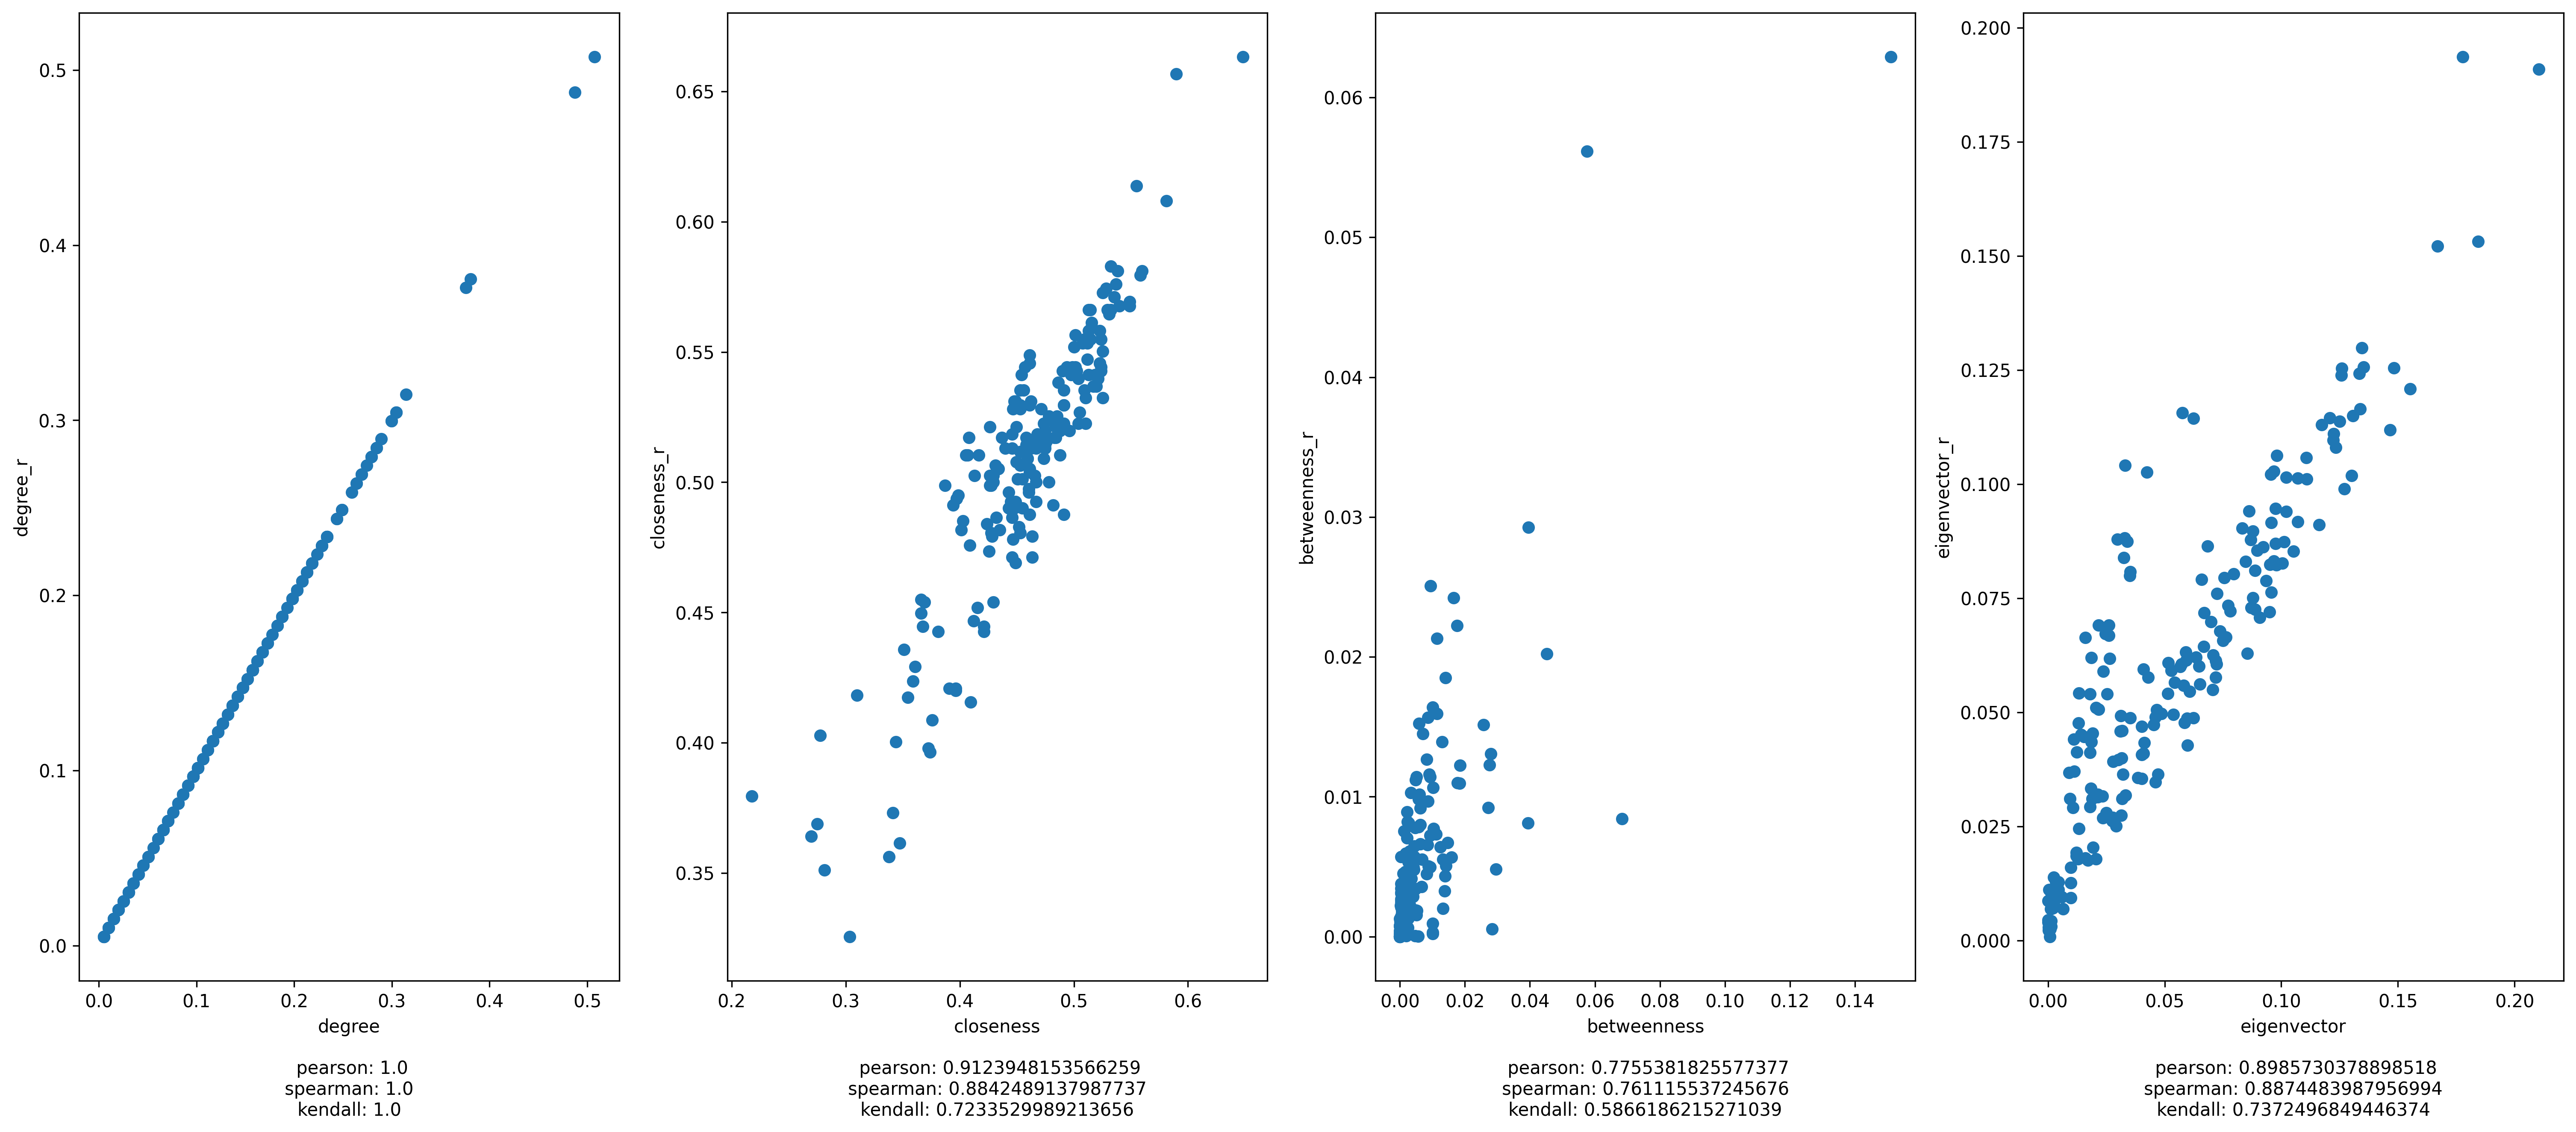

#Centrality Polblog

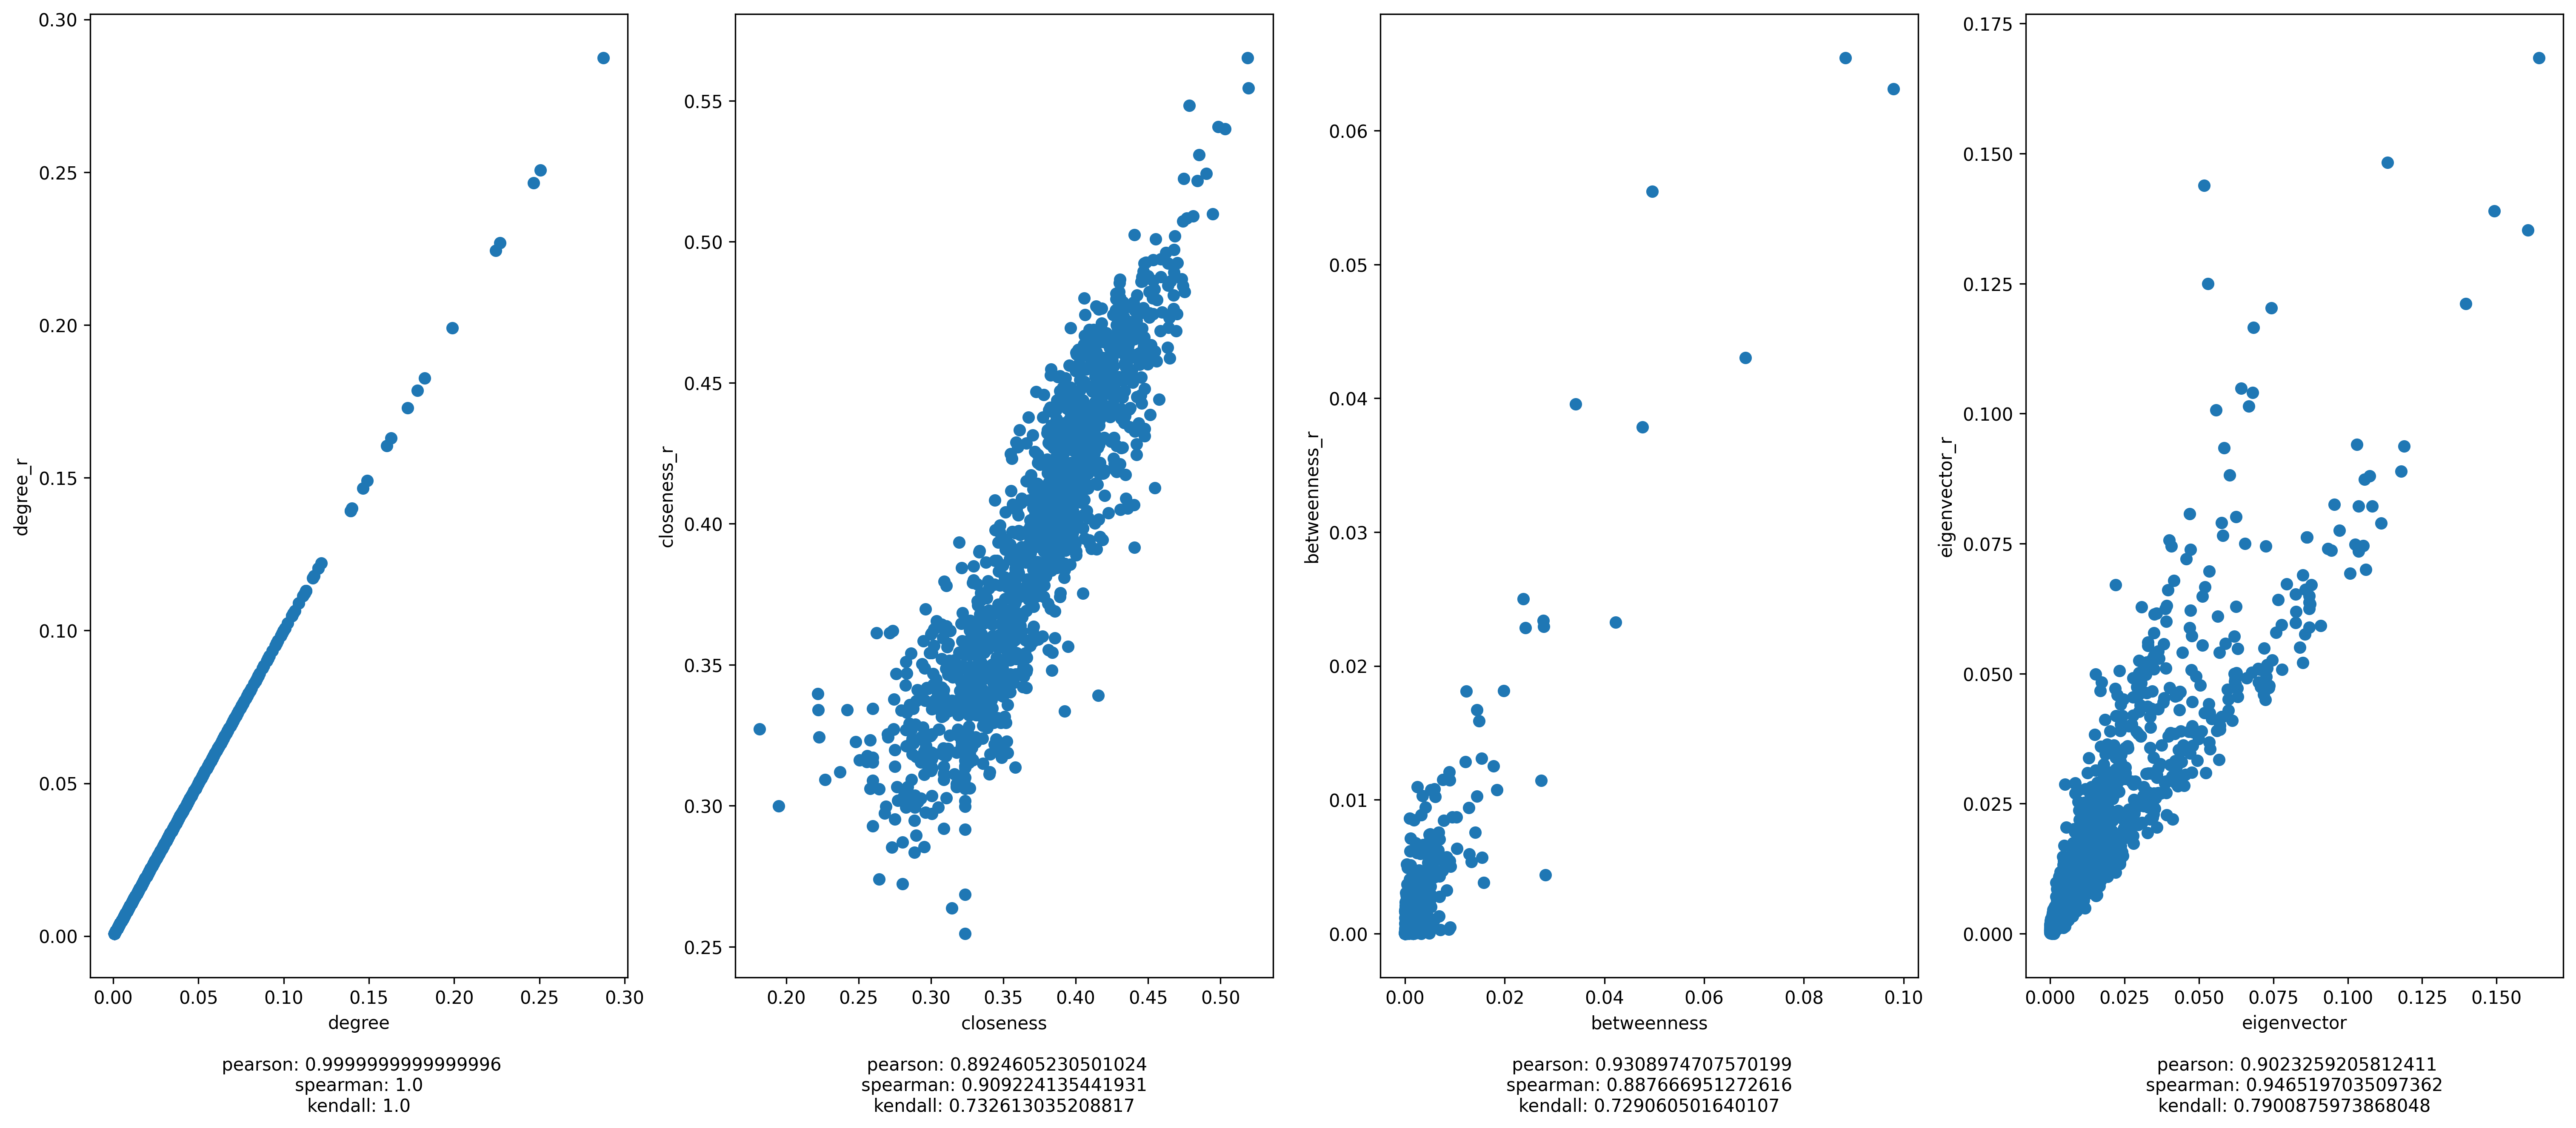

#Centrality terrorists

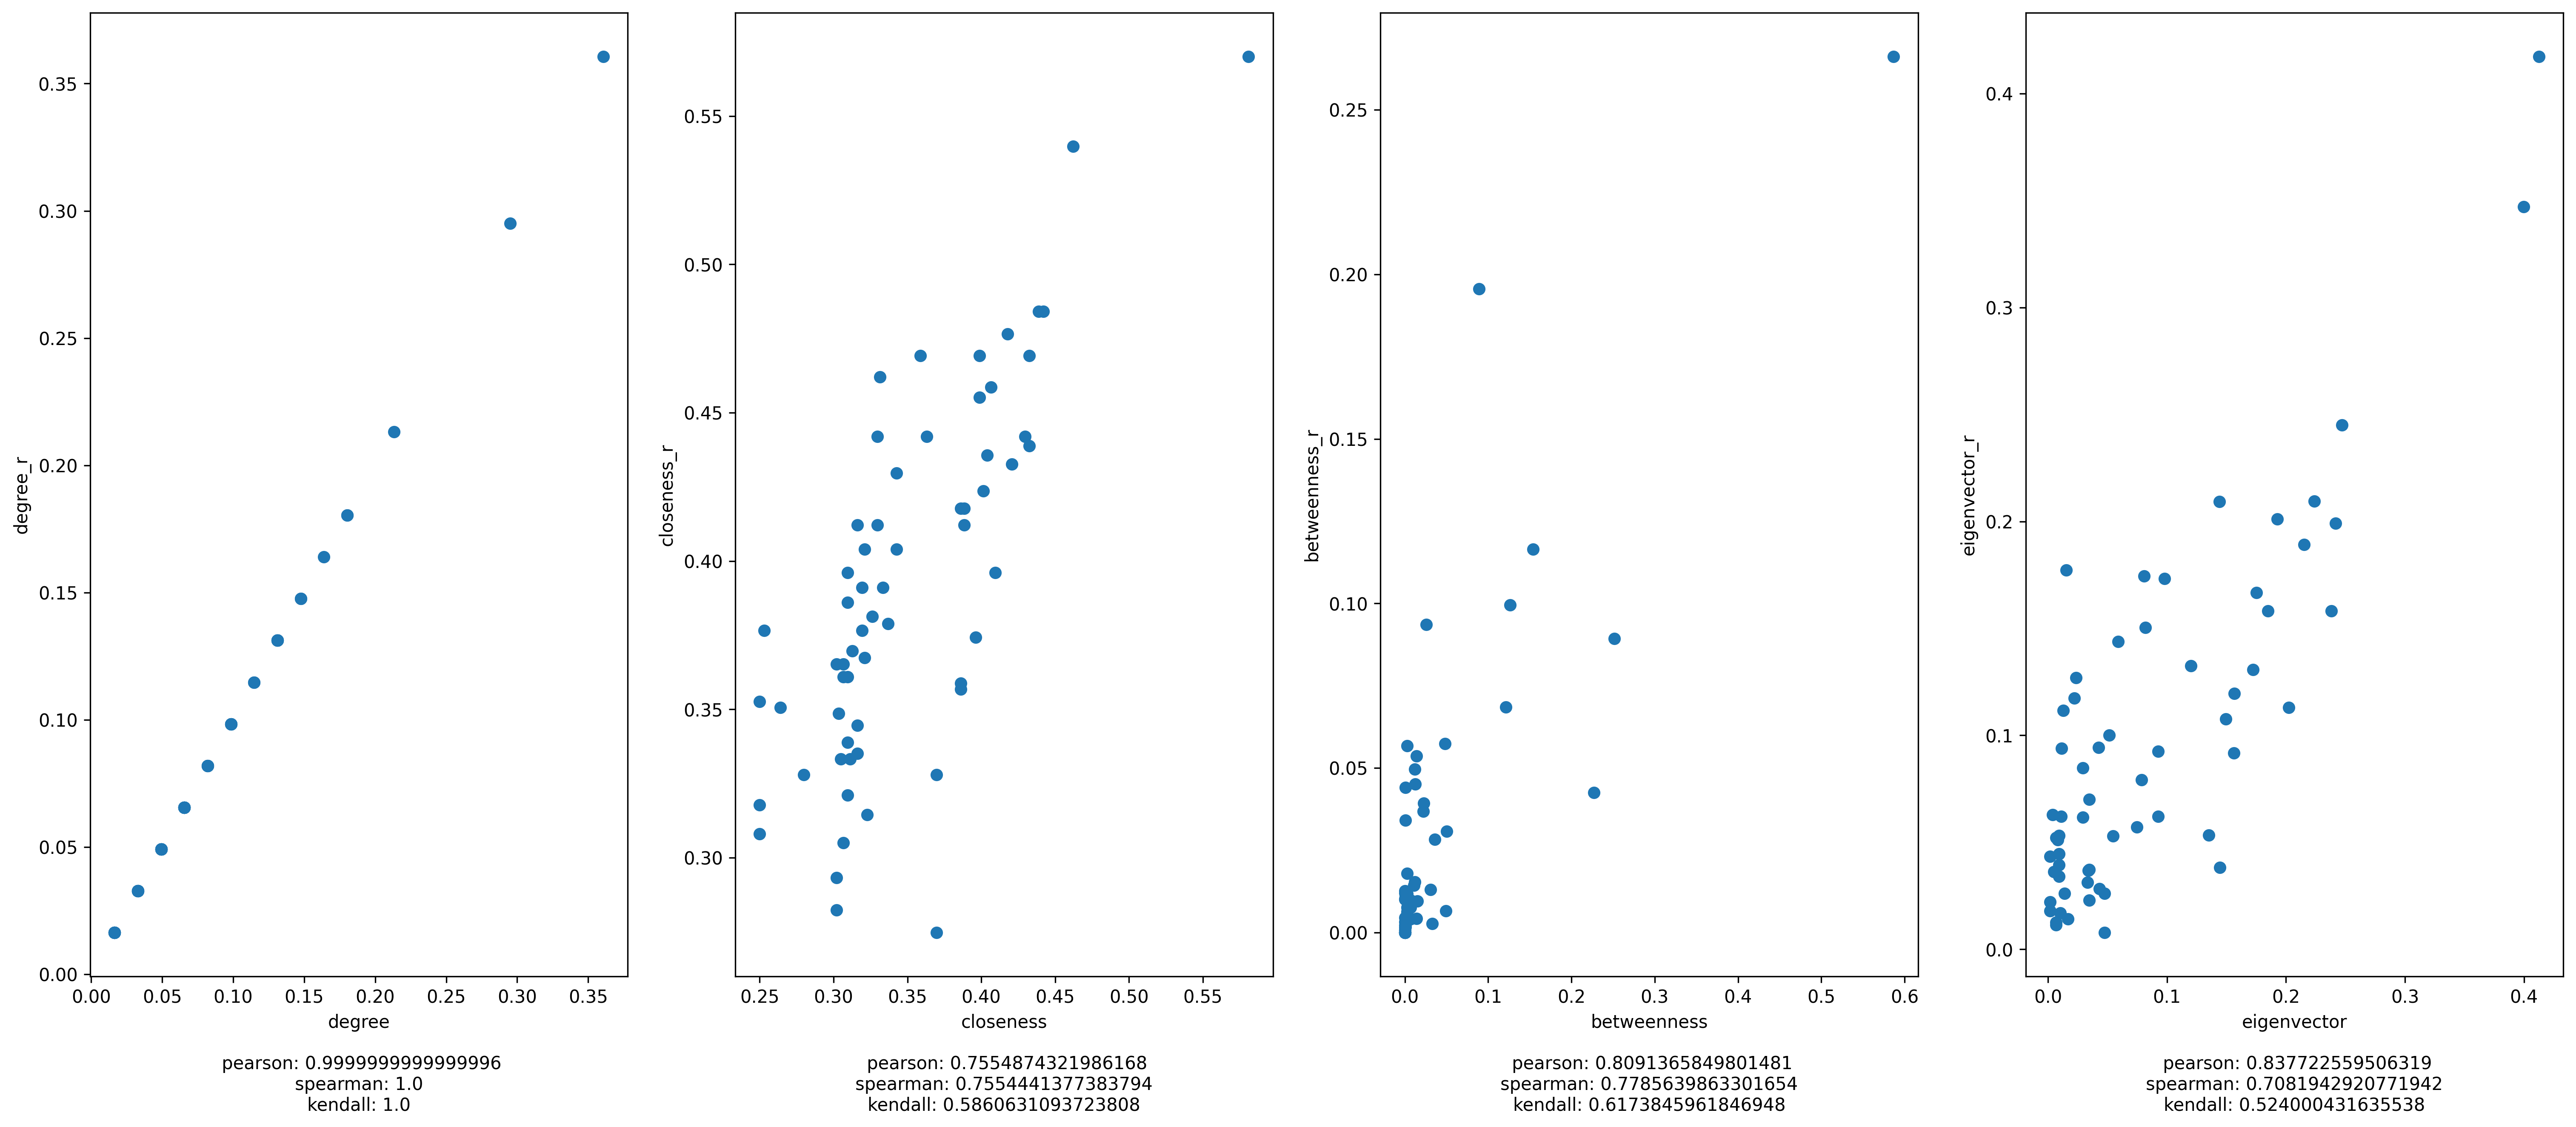

In [ ]:
def cnetrality_and_random(graph: nx.Graph, name):
  r = random_reference(graph, connectivity=False)

  degree = (list(nx.degree_centrality(graph).values()), list(nx.degree_centrality(r).values()))
  closeness = (list(nx.closeness_centrality(graph).values()), list(nx.closeness_centrality(r).values()))
  betweenness = (list(nx.betweenness_centrality(graph).values()),list(nx.betweenness_centrality(r).values()))
  eigenvector = (list(nx.eigenvector_centrality(graph).values()), list(nx.eigenvector_centrality(r).values()))
  display(Markdown(f"#{name}"))

  plt.rcParams['figure.dpi'] = 300
  plt.rcParams['savefig.dpi'] = 300
  plt.subplots(figsize=(25, 10))
#plot 1:
  plt.subplot(1, 4, 1)
  plt.scatter(degree[0], degree[1])
  pearson = pearsonr(degree[0], degree[1])
  spearman = spearmanr(degree[0], degree[1])
  kendall = kendalltau(degree[0], degree[1])
  plt.xlabel("degree"+ f"\n \n pearson: {pearson[0]}\nspearman: {spearman[0]}\nkendall: {kendall[0]}")
  plt.ylabel("degree_r")

#plot 2:
  plt.subplot(1, 4, 2)
  plt.scatter(closeness[0],closeness[1])
  pearson = pearsonr(closeness[0],closeness[1])
  spearman = spearmanr(closeness[0],closeness[1])
  kendall = kendalltau(closeness[0],closeness[1])
  plt.xlabel("closeness"+ f"\n \n pearson: {pearson[0]}\nspearman: {spearman[0]}\nkendall: {kendall[0]}")
  plt.ylabel("closeness_r")
#plot 3:

  plt.subplot(1, 4, 3)
  plt.scatter(betweenness[0],betweenness[1])
  pearson = pearsonr(betweenness[0],betweenness[1])
  spearman = spearmanr(betweenness[0],betweenness[1])
  kendall = kendalltau(betweenness[0],betweenness[1])
  plt.xlabel("betweenness"+ f"\n \n pearson: {pearson[0]}\nspearman: {spearman[0]}\nkendall: {kendall[0]}")
  plt.ylabel("betweenness_r")
  
  
#plot :
  plt.subplot(1, 4, 4)
  plt.scatter(eigenvector[0],eigenvector[1])
  pearson = pearsonr(eigenvector[0],eigenvector[1])
  spearman = spearmanr(eigenvector[0],eigenvector[1])
  kendall = kendalltau(eigenvector[0],eigenvector[1])
  plt.xlabel("eigenvector"+ f"\n \n pearson: {pearson[0]}\nspearman: {spearman[0]}\nkendall: {kendall[0]}")
  plt.ylabel("eigenvector_r")
  plt.show()



cnetrality_and_random(jazz, "Centrality Jazz")
cnetrality_and_random(polblog, "Centrality Polblog")
cnetrality_and_random(terrorists, "Centrality terrorists")

#Degree centralisation discussion


Since the degree of a node does not change, when randomizing the graph, the degree of the centralization does not change either, resulting in a linear scatter.

**A03.3 **

Page Rank In the dataset “Florida_foodweb.graphml” each node is a species, and a directed link exists between 𝑖 and 𝑗 if 𝑖 feeds from 𝑗 Task: Rank the nodes’importance by means ofthe PageRank algortihm.
+ Use different values of 𝛼, e.g. 𝛼 = 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.99
+ Compute Spearman’s rank correlation 𝜌 between the PageRanks for 𝛼0 = 0.85 and all other 𝛼s, then plot them as a
scatter plot with 𝛼 on the x-axis and 𝜌(𝛼) on the y-axis.

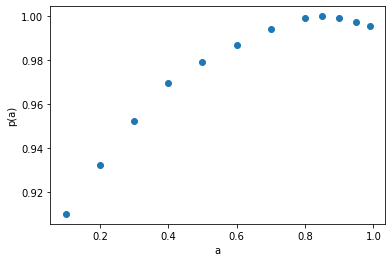

In [11]:
def page_rank(graph: nx.Graph):
  a = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.99]
  pr = list(pagerank(graph, 0.85).values())
  final = [spearmanr(list(pagerank(graph,x).values()), pr)[0] for x in a]
  plt.scatter(a, final)
  plt.xlabel("a")
  plt.ylabel("p(a)")
  plt.show()
  
page_rank(florida)

